# KNN Classification #
In this project, we'll use KNN to try and classify data into unknown variables.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("KNN_Project_Data")
df.head()

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

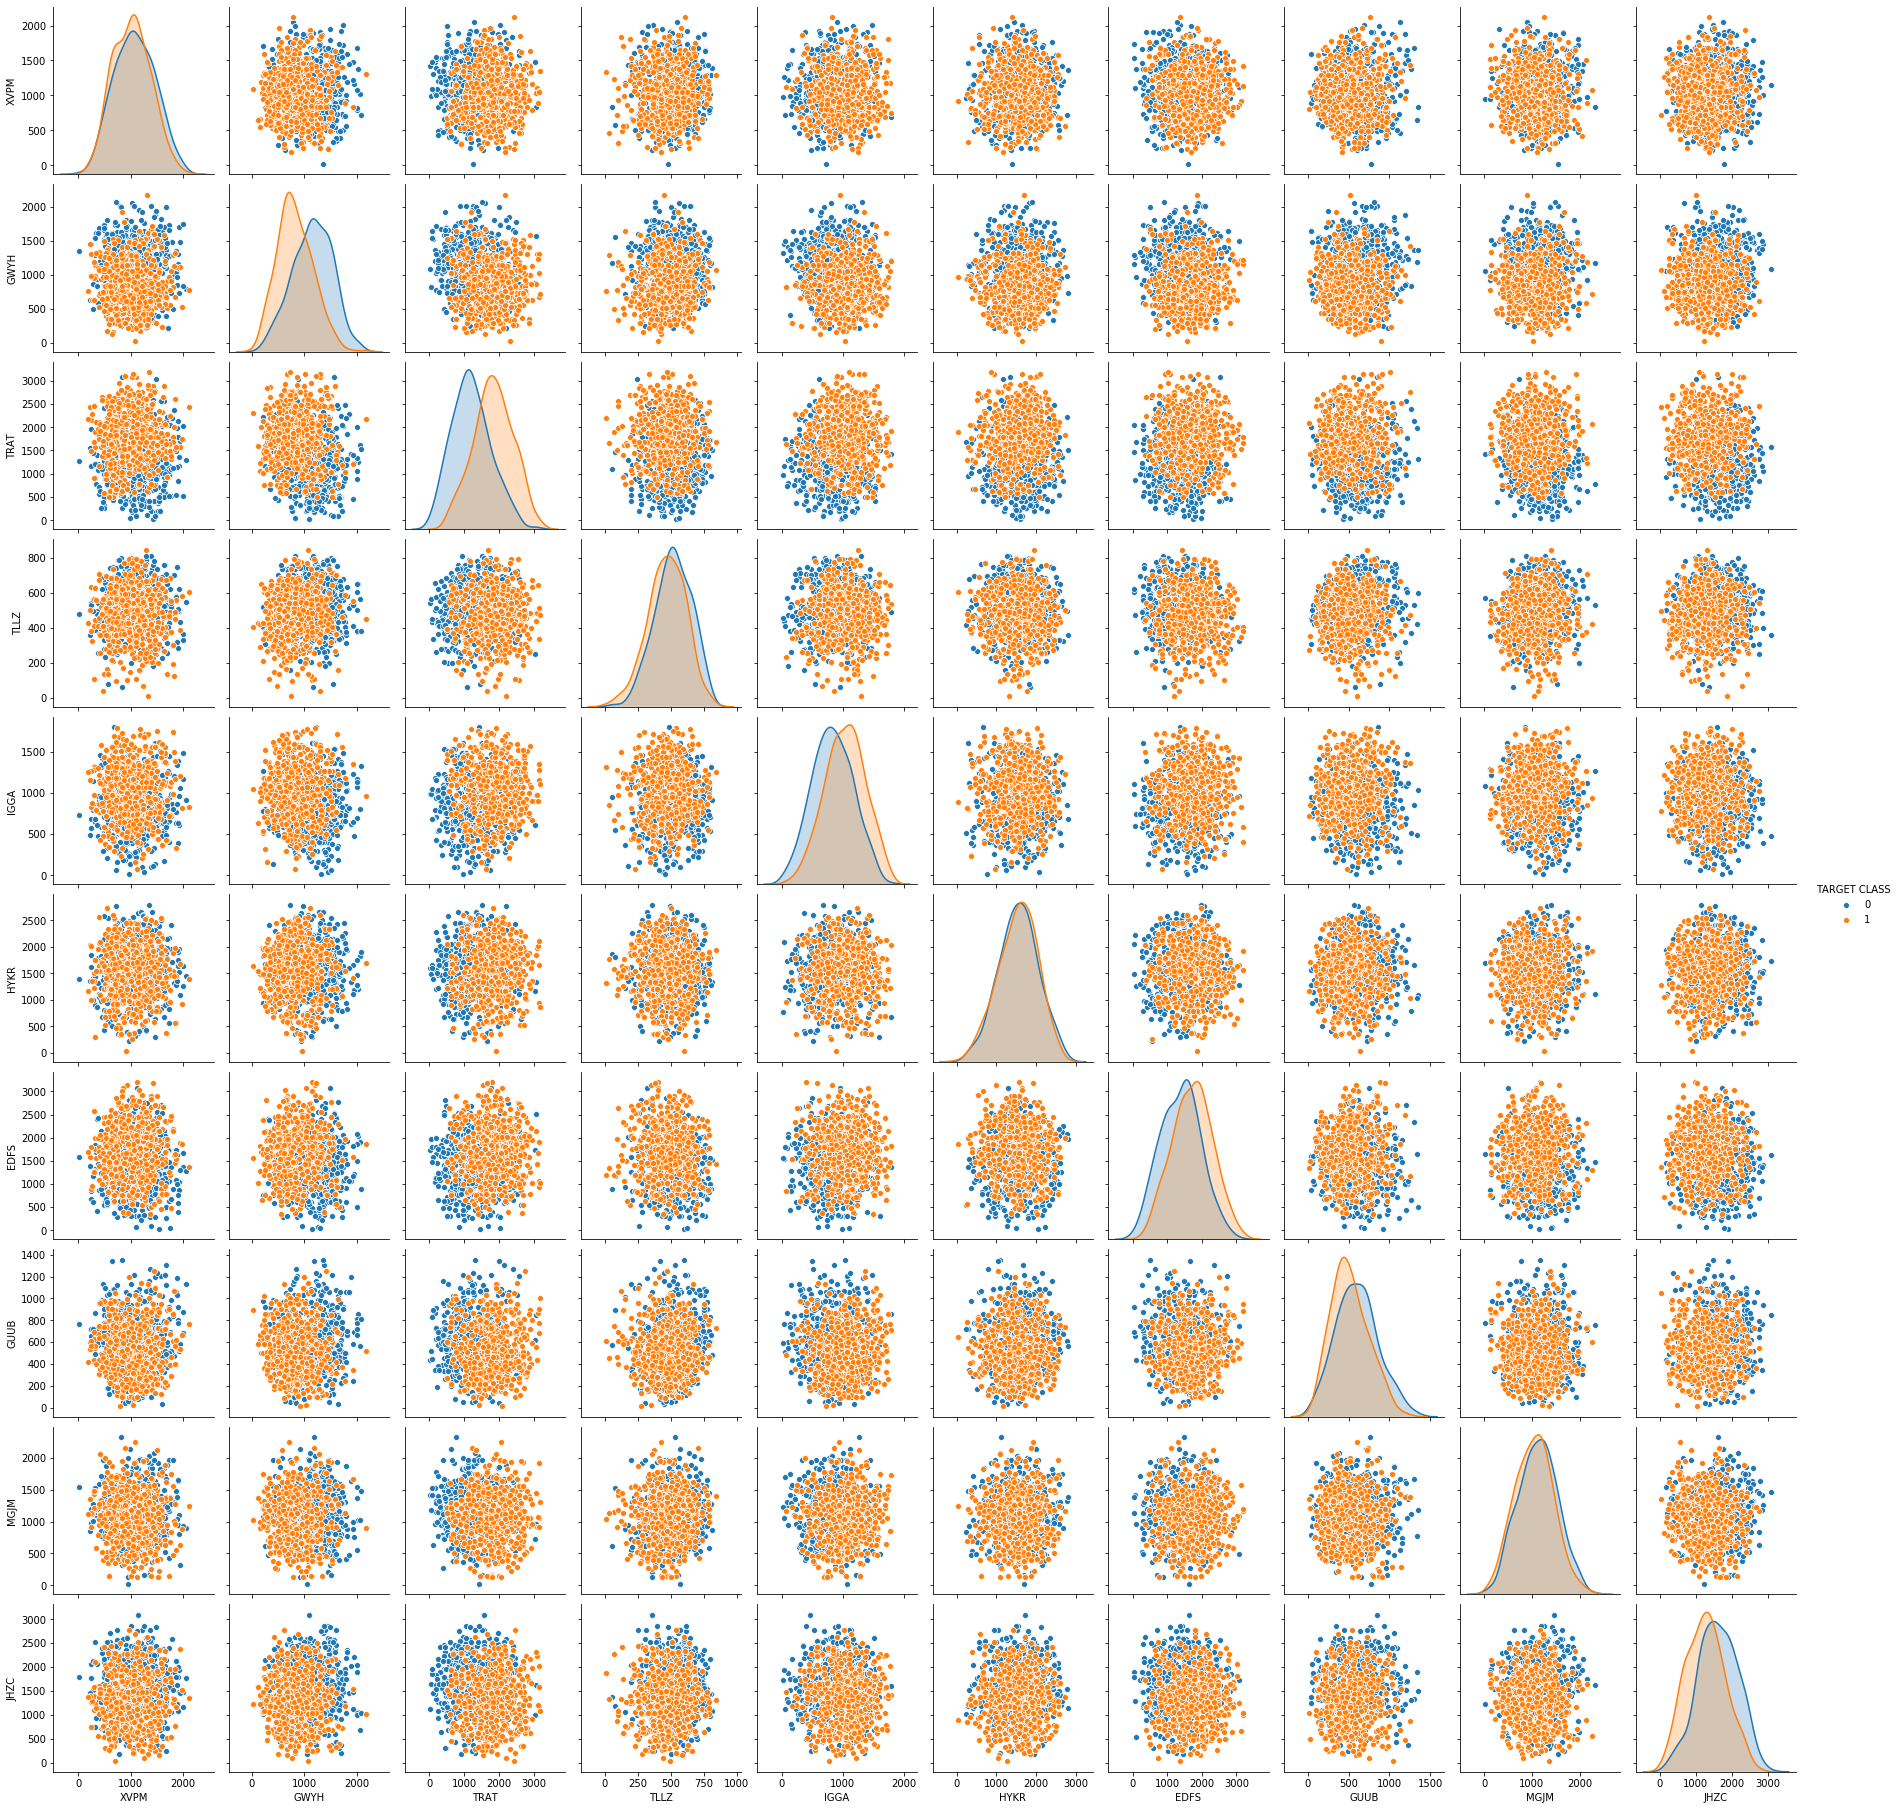

In [3]:
sns.pairplot(df,hue="TARGET CLASS")

### Standardising the variables and transforming them into a scaled version ###

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
scaler.fit(df.drop("TARGET CLASS",axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
scaled_version = scaler.transform(df.drop("TARGET CLASS",axis=1))

In [8]:
scaled_df = pd.DataFrame(scaled_version,columns=df.columns[:-1])
scaled_df.head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

### Train-test Split ###

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
df.columns

Index(['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC', 'TARGET CLASS'],
      dtype='object')

In [11]:
X = scaled_version
y=df["TARGET CLASS"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=75)

### Building an initial KNN model ###

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier(n_neighbors=1)

In [14]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [15]:
prediction = knn.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,prediction))
print("\n")
print(classification_report(y_test,prediction))

[[107  52]
 [ 36 105]]


              precision    recall  f1-score   support

           0       0.75      0.67      0.71       159
           1       0.67      0.74      0.70       141

    accuracy                           0.71       300
   macro avg       0.71      0.71      0.71       300
weighted avg       0.71      0.71      0.71       300



The accurary of this model is fairly poor, so we can use the elbow method to pick a better K value.

In [17]:
error_rate = []

for i in range(1,51):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [18]:
d = {"Error Rate": error_rate, "k":np.arange(1,51)}
k = pd.DataFrame(data=d)
k.head()

Error Rate  k
0    0.293333  1
1    0.250000  2
2    0.236667  3
3    0.226667  4
4    0.200000  5

In [19]:
import plotly.express as px
fig=px.line(k,x="k",y="Error Rate",title='Error Rate vs. K Value')
fig.show()

### Retraining the model with a new K value ###
From the plot above, we can see that the error rate is lowest when k=33

In [20]:
knn = KNeighborsClassifier(n_neighbors=33)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('When k=33')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

When k=33


[[130  29]
 [ 17 124]]


              precision    recall  f1-score   support

           0       0.88      0.82      0.85       159
           1       0.81      0.88      0.84       141

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



<div class='alert-success'>
Now we have a model with a large improvement in performance compared to the previous one.
<br>
Our accuracy is now much better considering we have are using unknown variables to classify our data.